In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import griddata, interpn
from scipy.stats import binned_statistic
import cmocean.cm as cm
import gsw

plt.rcParams['font.size'] = 12

In [2]:
# files 96 - 100 are the transect from Jan 5
# files 108 and 109 are the two casts at C2
# files 110 - 114 are the transect from Jan 7

# Bring in Data

In [121]:
mp95 = xr.open_dataset('dat_0095.nc') #205
mp94 = xr.open_dataset('dat_0094.nc') #204
mp93 = xr.open_dataset('dat_0093.nc') #203
mp91 = xr.open_dataset('dat_0091.nc') #201
mp90 = xr.open_dataset('dat_0090.nc') #200

mp97 = xr.open_dataset('dat_0097.nc') #201
mp98 = xr.open_dataset('dat_0098.nc') #203
mp99 = xr.open_dataset('dat_0099.nc') #204
mp00 = xr.open_dataset('dat_0100.nc') #205

mp14 = xr.open_dataset('dat_0114.nc') #205
mp13 = xr.open_dataset('dat_0113.nc') #204
mp12 = xr.open_dataset('dat_0112.nc') #203
mp11 = xr.open_dataset('dat_0111.nc') #201
mp15 = xr.open_dataset('dat_0115.nc') #200

In [6]:
sh95 = xr.open_dataset('shear0095.nc') #205
sh94 = xr.open_dataset('shear0094.nc') #204
sh93 = xr.open_dataset('shear0093.nc') #203
sh91 = xr.open_dataset('shear0091.nc') #201
sh90 = xr.open_dataset('shear0090.nc') #200

sh97 = xr.open_dataset('shear0097.nc') #201
sh98 = xr.open_dataset('shear0098.nc') #203
sh99 = xr.open_dataset('shear0099.nc') #204
sh00 = xr.open_dataset('shear0100.nc') #205

sh14 = xr.open_dataset('shear0114.nc') #205
sh13 = xr.open_dataset('shear0113.nc') #204
sh12 = xr.open_dataset('shear0112.nc') #203
sh11 = xr.open_dataset('shear0111.nc') #201
sh15 = xr.open_dataset('shear0115.nc') #200

# 95 = 00 = 14
# 94 = 99 = 13
# 93 = 98 = 12
# 91 = 97 = 11
# 90 = 15

In [36]:
lon95fast = [-72.46381 for i in range(len(sh95.SH_HP[0]))]
lon94fast = [-72.45491 for i in range(len(sh94.SH_HP[0]))]
lon93fast = [-72.445 for i in range(len(sh93.SH_HP[0]))]
lon91fast = [-72.43545 for i in range(len(sh91.SH_HP[0]))]
lon90fast = [-72.42602 for i in range(len(sh90.SH_HP[0]))]


lat95fast = [-42.38165 for i in range(len(sh95.SH_HP[0]))]
lat94fast = [-42.38076 for i in range(len(sh94.SH_HP[0]))]
lat93fast = [-42.38076 for i in range(len(sh93.SH_HP[0]))]
lat91fast = [-42.37947 for i in range(len(sh91.SH_HP[0]))]
lat90fast = [-42.38046 for i in range(len(sh90.SH_HP[0]))]


lon97fast = [-72.43545 for i in range(len(sh97.SH_HP[0]))] 
lon98fast = [-72.445 for i in range(len(sh98.SH_HP[0]))]
lon99fast = [-72.45491 for i in range(len(sh99.SH_HP[0]))]
lon00fast = [-72.46381 for i in range(len(sh00.SH_HP[0]))]

lat97fast = [-42.37947 for i in range(len(sh97.SH_HP[0]))]
lat98fast = [-42.38076 for i in range(len(sh98.SH_HP[0]))]
lat99fast = [-42.38076 for i in range(len(sh99.SH_HP[0]))]
lat00fast = [-42.38165 for i in range(len(sh00.SH_HP[0]))]


lon11fast = [-72.43545 for i in range(len(sh11.SH_HP[0]))]
lon12fast = [-72.445 for i in range(len(sh12.SH_HP[0]))]
lon13fast = [-72.45491 for i in range(len(sh13.SH_HP[0]))]
lon14fast = [-72.46381 for i in range(len(sh14.SH_HP[0]))]
lon15fast = [-72.42602 for i in range(len(sh15.SH_HP[0]))]


lat11fast = [-42.37947 for i in range(len(sh11.SH_HP[0]))]
lat12fast = [-42.38076 for i in range(len(sh12.SH_HP[0]))]
lat13fast = [-42.38076 for i in range(len(sh13.SH_HP[0]))]
lat14fast = [-42.38165  for i in range(len(sh14.SH_HP[0]))]
lat15fast = [-42.38046 for i in range(len(sh15.SH_HP[0]))]

# *transect varies most in the east-west so lets plot according to lon

### analysis

In [43]:
shear1_5am = abs(np.append(sh90.SH_HP[0],np.append(sh91.SH_HP[0],np.append(sh93.SH_HP[0],np.append(sh94.SH_HP[0],sh95.SH_HP[0])))))
shear2_5am = abs(np.append(sh90.SH_HP[1],np.append(sh91.SH_HP[1],np.append(sh93.SH_HP[1],np.append(sh94.SH_HP[0],sh95.SH_HP[0])))))
Pshear_5am = np.append(sh90.Indep_var_fast,np.append(sh91.Indep_var_fast,np.append(sh93.Indep_var_fast,np.append(sh94.Indep_var_fast,sh95.Indep_var_fast))))

lat_shear_5am = np.append(lat90fast,np.append(lat91fast,np.append(lat93fast,np.append(lat94fast, lat95fast))))
lon_shear_5am = np.append(lon90fast,np.append(lon91fast,np.append(lon93fast,np.append(lon94fast, lon95fast))))

In [44]:
shear1_5 = abs(np.append(sh97.SH_HP[0],np.append(sh98.SH_HP[0],np.append(sh99.SH_HP[0],sh00.SH_HP[0]))))
shear2_5 = abs(np.append(sh97.SH_HP[1],np.append(sh98.SH_HP[1],np.append(sh99.SH_HP[1],sh00.SH_HP[1]))))
Pshear_5 = np.append(sh97.Indep_var_fast,np.append(sh98.Indep_var_fast,np.append(sh99.Indep_var_fast,sh00.Indep_var_fast)))

lat_shear_5 = np.append(lat97fast,np.append(lat98fast,np.append(lat99fast,lat00fast)))
lon_shear_5 = np.append(lon97fast,np.append(lon98fast,np.append(lon99fast,lon00fast)))

In [45]:
shear1_7 = abs(np.append(sh11.SH_HP[0],np.append(sh12.SH_HP[0],np.append(sh13.SH_HP[0],np.append(sh14.SH_HP[0],sh15.SH_HP[0])))))
shear2_7 = abs(np.append(sh11.SH_HP[1],np.append(sh12.SH_HP[1],np.append(sh13.SH_HP[1],np.append(sh14.SH_HP[0],sh15.SH_HP[0])))))
Pshear_7 = np.append(sh11.Indep_var_fast,np.append(sh12.Indep_var_fast,np.append(sh13.Indep_var_fast,np.append(sh14.Indep_var_fast,sh15.Indep_var_fast))))

lat_shear_7 = np.append(lat11fast,np.append(lat12fast,np.append(lat13fast,np.append(lat14fast, lat15fast))))
lon_shear_7 = np.append(lon11fast,np.append(lon12fast,np.append(lon13fast,np.append(lon14fast, lon15fast))))

In [46]:
data = {'lon':lon_shear_5am, 'lat':lat_shear_5am, 'pressure':Pshear_5am, 'shear1':shear1_5am, 'shear2':shear2_5am}
dtShear_5am = pd.DataFrame(data)

In [47]:
data = {'lon':lon_shear_5, 'lat':lat_shear_5, 'pressure':Pshear_5, 'shear1':shear1_5, 'shear2':shear2_5}
dtShear_5 = pd.DataFrame(data)

In [48]:
data = {'lon':lon_shear_7, 'lat':lat_shear_7, 'pressure':Pshear_7, 'shear1':shear1_7, 'shear2':shear2_7}
dtShear_7 = pd.DataFrame(data)

In [49]:
lats = [-42.38165, -42.38076, -42.38076, -42.37947, -42.38046]
lons = [-72.46381, -72.45491, -72.445, -72.43545, -72.42602]

In [77]:
# bin by depth in 1 m intervals
depth_bins = np.arange(0,np.max(dtShear_5am.pressure)+1,1)

shear1_bin_5am =np.array([binned_statistic(dtShear_5am.pressure[(dtShear_5am.lon == lon)], dtShear_5am.shear1[(dtShear_5am.lon == lon)], statistic='mean', bins=depth_bins)[0][:] for lon in lons]).flatten()
shear2_bin_5am =np.array([binned_statistic(dtShear_5am.pressure[(dtShear_5am.lon == lon)], dtShear_5am.shear2[(dtShear_5am.lon == lon)], statistic='mean', bins=depth_bins)[0][:] for lon in lons]).flatten()

pressure_bin_5am = np.tile(depth_bins[:-1],5)
lat_bin_5am = np.array([np.repeat(lat, len(depth_bins)-1) for lat in lats]).flatten()
lon_bin_5am = np.array([np.repeat(lon, len(depth_bins)-1) for lon in lons]).flatten()

In [80]:
depth_bins = np.arange(0,np.max(dtShear_5.pressure)+1,1)

shear1_bin_5 =np.array([binned_statistic(dtShear_5.pressure[(dtShear_5.lon == lon)], dtShear_5.shear1[(dtShear_5.lon == lon)], statistic='mean', bins=depth_bins)[0][:] for lon in lons[:-1]]).flatten()
shear2_bin_5 =np.array([binned_statistic(dtShear_5.pressure[(dtShear_5.lon == lon)], dtShear_5.shear2[(dtShear_5.lon == lon)], statistic='mean', bins=depth_bins)[0][:] for lon in lons[:-1]]).flatten()

pressure_bin_5 = np.tile(depth_bins[:-1],4)
lat_bin_5 = np.array([np.repeat(lat, len(depth_bins)-1) for lat in lats[:-1]]).flatten()
lon_bin_5 = np.array([np.repeat(lon, len(depth_bins)-1) for lon in lons[:-1]]).flatten()

In [81]:
depth_bins = np.arange(0,np.max(dtShear_7.pressure)+1,1)

shear1_bin_7 =np.array([binned_statistic(dtShear_7.pressure[(dtShear_7.lon == lon)], dtShear_7.shear1[(dtShear_7.lon == lon)], statistic='mean', bins=depth_bins)[0][:] for lon in lons]).flatten()
shear2_bin_7 =np.array([binned_statistic(dtShear_7.pressure[(dtShear_7.lon == lon)], dtShear_7.shear2[(dtShear_7.lon == lon)], statistic='mean', bins=depth_bins)[0][:] for lon in lons]).flatten()

pressure_bin_7 = np.tile(depth_bins[:-1],5)
lat_bin_7 = np.array([np.repeat(lat, len(depth_bins)-1) for lat in lats]).flatten()
lon_bin_7 = np.array([np.repeat(lon, len(depth_bins)-1) for lon in lons]).flatten()

In [82]:
data = {'lon':lon_bin_5am, 'lat':lat_bin_5am, 'pressure':pressure_bin_5am, 'shear1':shear1_bin_5am, 'shear2':shear2_bin_5am}
shear_bin_5am = pd.DataFrame(data)

data = {'lon':lon_bin_5, 'lat':lat_bin_5, 'pressure':pressure_bin_5, 'shear1':shear1_bin_5, 'shear2':shear2_bin_5}
shear_bin_5 = pd.DataFrame(data)

data = {'lon':lon_bin_7, 'lat':lat_bin_7, 'pressure':pressure_bin_7, 'shear1':shear1_bin_7, 'shear2':shear2_bin_7}
shear_bin_7 = pd.DataFrame(data)

In [83]:
shear_min = 0
shear_max = 1

In [116]:
lons

[-72.46381, -72.45491, -72.445, -72.43545, -72.42602]

In [117]:
lon_label = ["-72.463\nstation205", "-72.454\nstation204", "-72.445\nstation203", "-72.435\nstation201", "-72.426\nstation200"]

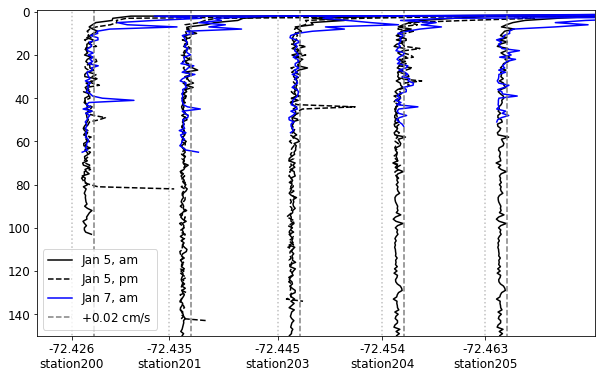

In [131]:
# prefer to see in spaced out line plot instead!

fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(shear_bin_5am.shear1[shear_bin_5am.lon==lons[0]]+lons[0]*10, shear_bin_5am.pressure[shear_bin_5am.lon==lons[0]], 'k', label="Jan 5, am")
ax.plot(shear_bin_5am.shear1[shear_bin_5am.lon==lons[1]]+lons[1]*10, shear_bin_5am.pressure[shear_bin_5am.lon==lons[1]], 'k')
ax.plot(shear_bin_5am.shear1[shear_bin_5am.lon==lons[2]]+lons[2]*10, shear_bin_5am.pressure[shear_bin_5am.lon==lons[2]], 'k')
ax.plot(shear_bin_5am.shear1[shear_bin_5am.lon==lons[3]]+lons[3]*10, shear_bin_5am.pressure[shear_bin_5am.lon==lons[3]], 'k')
ax.plot(shear_bin_5am.shear1[shear_bin_5am.lon==lons[3]]+lons[4]*10, shear_bin_5am.pressure[shear_bin_5am.lon==lons[4]], 'k')


ax.plot(shear_bin_5.shear1[shear_bin_5.lon==lons[0]][:-15]+lons[0]*10, shear_bin_5.pressure[shear_bin_5.lon==lons[0]][:-15], 'k--', label='Jan 5, pm')
ax.plot(shear_bin_5.shear1[shear_bin_5.lon==lons[1]][:-15]+lons[1]*10, shear_bin_5.pressure[shear_bin_5.lon==lons[1]][:-15], 'k--')
ax.plot(shear_bin_5.shear1[shear_bin_5.lon==lons[2]][:-133]+lons[2]*10, shear_bin_5.pressure[shear_bin_5.lon==lons[2]][:-133], 'k--')
ax.plot(shear_bin_5.shear1[shear_bin_5.lon==lons[3]][:-195]+lons[3]*10, shear_bin_5.pressure[shear_bin_5.lon==lons[3]][:-195], 'k--')

ax.plot(shear_bin_7.shear1[shear_bin_7.lon==lons[0]][:-3]+lons[0]*10, shear_bin_7.pressure[shear_bin_7.lon==lons[0]][:-3], 'b', label= "Jan 7, am")
ax.plot(shear_bin_7.shear1[shear_bin_7.lon==lons[1]][:-3]+lons[1]*10, shear_bin_7.pressure[shear_bin_7.lon==lons[1]][:-3], 'b')
ax.plot(shear_bin_7.shear1[shear_bin_7.lon==lons[2]][:-12]+lons[2]*10, shear_bin_7.pressure[shear_bin_7.lon==lons[2]][:-12], 'b')
ax.plot(shear_bin_7.shear1[shear_bin_7.lon==lons[3]][:-15]+lons[3]*10, shear_bin_7.pressure[shear_bin_7.lon==lons[3]][:-15], 'b')
ax.plot(shear_bin_7.shear1[shear_bin_7.lon==lons[4]][:-17]+lons[4]*10, shear_bin_7.pressure[shear_bin_7.lon==lons[4]][:-17], 'b')

ax.plot([lons[0]*10,lons[0]*10],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[1]*10,lons[1]*10],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[2]*10,lons[2]*10],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[3]*10,lons[3]*10],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[4]*10,lons[4]*10],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[0]*10+0.02, lons[0]*10+0.02],[276,-1],'grey',ls='--',label='$+ 0.02$ cm/s')
ax.plot([lons[1]*10+0.02, lons[1]*10+0.02],[276,-1],'grey',ls='--')
ax.plot([lons[2]*10+0.02, lons[2]*10+0.02],[276,-1],'grey',ls='--')
ax.plot([lons[3]*10+0.02, lons[3]*10+0.02],[276,-1],'grey',ls='--')
ax.plot([lons[4]*10+0.02, lons[4]*10+0.02],[276,-1],'grey',ls='--')


ax.legend(loc="lower left")
ax.set_xlim([-724.67,-724.16])
ax.set_ylim([150,-1])
ax.set_xticks([lons[i]*10 for i in [4,3,2,1,0]]);
ax.set_xticklabels(lon_label);

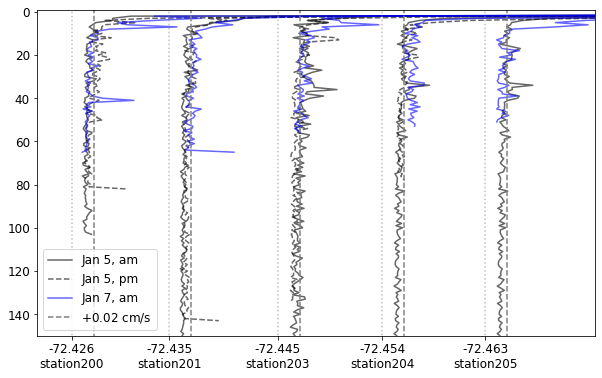

In [134]:
# prefer to see in spaced out line plot instead!

fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(shear_bin_5am.shear2[shear_bin_5am.lon==lons[0]]+lons[0]*10, shear_bin_5am.pressure[shear_bin_5am.lon==lons[0]], 'k', label="Jan 5, am", alpha = 0.6)
ax.plot(shear_bin_5am.shear2[shear_bin_5am.lon==lons[1]]+lons[1]*10, shear_bin_5am.pressure[shear_bin_5am.lon==lons[1]], 'k', alpha = 0.6)
ax.plot(shear_bin_5am.shear2[shear_bin_5am.lon==lons[2]]+lons[2]*10, shear_bin_5am.pressure[shear_bin_5am.lon==lons[2]], 'k', alpha = 0.6)
ax.plot(shear_bin_5am.shear2[shear_bin_5am.lon==lons[3]]+lons[3]*10, shear_bin_5am.pressure[shear_bin_5am.lon==lons[3]], 'k', alpha = 0.6)
ax.plot(shear_bin_5am.shear2[shear_bin_5am.lon==lons[3]]+lons[4]*10, shear_bin_5am.pressure[shear_bin_5am.lon==lons[4]], 'k', alpha = 0.6)


ax.plot(shear_bin_5.shear2[shear_bin_5.lon==lons[0]][:-15]+lons[0]*10, shear_bin_5.pressure[shear_bin_5.lon==lons[0]][:-15], 'k--', label='Jan 5, pm', alpha = 0.6)
ax.plot(shear_bin_5.shear2[shear_bin_5.lon==lons[1]][:-15]+lons[1]*10, shear_bin_5.pressure[shear_bin_5.lon==lons[1]][:-15], 'k--', alpha = 0.6)
ax.plot(shear_bin_5.shear2[shear_bin_5.lon==lons[2]][:-133]+lons[2]*10, shear_bin_5.pressure[shear_bin_5.lon==lons[2]][:-133], 'k--', alpha = 0.6)
ax.plot(shear_bin_5.shear2[shear_bin_5.lon==lons[3]][:-195]+lons[3]*10, shear_bin_5.pressure[shear_bin_5.lon==lons[3]][:-195], 'k--', alpha = 0.6)

ax.plot(shear_bin_7.shear2[shear_bin_7.lon==lons[0]][:-3]+lons[0]*10, shear_bin_7.pressure[shear_bin_7.lon==lons[0]][:-3], 'b', label= "Jan 7, am", alpha = 0.6)
ax.plot(shear_bin_7.shear2[shear_bin_7.lon==lons[1]][:-3]+lons[1]*10, shear_bin_7.pressure[shear_bin_7.lon==lons[1]][:-3], 'b', alpha = 0.6)
ax.plot(shear_bin_7.shear2[shear_bin_7.lon==lons[2]][:-12]+lons[2]*10, shear_bin_7.pressure[shear_bin_7.lon==lons[2]][:-12], 'b', alpha = 0.6)
ax.plot(shear_bin_7.shear2[shear_bin_7.lon==lons[3]][:-15]+lons[3]*10, shear_bin_7.pressure[shear_bin_7.lon==lons[3]][:-15], 'b', alpha = 0.6)
ax.plot(shear_bin_7.shear2[shear_bin_7.lon==lons[4]][:-17]+lons[4]*10, shear_bin_7.pressure[shear_bin_7.lon==lons[4]][:-17], 'b', alpha = 0.6)

ax.plot([lons[0]*10,lons[0]*10],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[1]*10,lons[1]*10],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[2]*10,lons[2]*10],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[3]*10,lons[3]*10],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[4]*10,lons[4]*10],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[0]*10+0.02, lons[0]*10+0.02],[276,-1],'grey',ls='--',label='$+ 0.02$ cm/s')
ax.plot([lons[1]*10+0.02, lons[1]*10+0.02],[276,-1],'grey',ls='--')
ax.plot([lons[2]*10+0.02, lons[2]*10+0.02],[276,-1],'grey',ls='--')
ax.plot([lons[3]*10+0.02, lons[3]*10+0.02],[276,-1],'grey',ls='--')
ax.plot([lons[4]*10+0.02, lons[4]*10+0.02],[276,-1],'grey',ls='--')


ax.legend(loc="lower left")
ax.set_xlim([-724.67,-724.16])
ax.set_ylim([150,-1])
ax.set_xticks([lons[i]*10 for i in [4,3,2,1,0]]);
ax.set_xticklabels(lon_label);

# and Dissipation!

In [125]:
diss = abs(np.append(mp97.diss_e[:,0],np.append(mp98.diss_e[:,0],np.append(mp99.diss_e[:,0],mp00.diss_e[:,0]))))
Pdiss = np.append(mp97.P_diss,np.append(mp98.P_diss,np.append(mp99.P_diss,mp00.P_diss)))
lat_diss = np.append(np.repeat(lats[0],len(mp97.P_diss[0])),np.append(np.repeat(lats[1],len(mp98.P_diss[0])),np.append(np.repeat(lats[2],len(mp99.P_diss[0])),np.repeat(lats[3],len(mp00.P_diss[0])))))
lon_diss = np.append(np.repeat(lons[0],len(mp97.P_diss[0])),np.append(np.repeat(lons[1],len(mp98.P_diss[0])),np.append(np.repeat(lons[2],len(mp99.P_diss[0])),np.repeat(lons[3],len(mp00.P_diss[0])))))

data = {'lon':lon_diss, 'lat':lat_diss, 'pressure':Pdiss, 'diss':diss}
dtDiss_5 = pd.DataFrame(data)

In [122]:
diss = abs(np.append(mp90.diss_e[:,0],np.append(mp91.diss_e[:,0],np.append(mp93.diss_e[:,0],np.append(mp94.diss_e[:,0],mp95.diss_e[:,0])))))
Pdiss = np.append(mp90.P_diss,np.append(mp91.P_diss,np.append(mp93.P_diss,np.append(mp94.P_diss,mp95.P_diss))))
lat_diss = np.append(np.repeat(lats[0],len(mp90.P_diss[0])),np.append(np.repeat(lats[1],len(mp91.P_diss[0])),np.append(np.repeat(lats[2],len(mp93.P_diss[0])),np.append(np.repeat(lats[3],len(mp94.P_diss[0])),np.repeat(lats[4],len(mp95.P_diss[0]))))))
lon_diss = np.append(np.repeat(lons[0],len(mp90.P_diss[0])),np.append(np.repeat(lons[1],len(mp91.P_diss[0])),np.append(np.repeat(lons[2],len(mp93.P_diss[0])),np.append(np.repeat(lons[3],len(mp94.P_diss[0])),np.repeat(lons[4],len(mp95.P_diss[0]))))))

data = {'lon':lon_diss, 'lat':lat_diss, 'pressure':Pdiss, 'diss':diss}
dtDiss_5am = pd.DataFrame(data)

In [123]:
diss = abs(np.append(mp11.diss_e[:,0],np.append(mp12.diss_e[:,0],np.append(mp13.diss_e[:,0],np.append(mp14.diss_e[:,0],mp15.diss_e[:,0])))))
Pdiss = np.append(mp11.P_diss,np.append(mp12.P_diss,np.append(mp13.P_diss,np.append(mp14.P_diss,mp15.P_diss))))
lat_diss = np.append(np.repeat(lats[0],len(mp11.P_diss[0])),np.append(np.repeat(lats[1],len(mp12.P_diss[0])),np.append(np.repeat(lats[2],len(mp13.P_diss[0])),np.append(np.repeat(lats[3],len(mp14.P_diss[0])),np.repeat(lats[4],len(mp15.P_diss[0]))))))
lon_diss = np.append(np.repeat(lons[0],len(mp11.P_diss[0])),np.append(np.repeat(lons[1],len(mp12.P_diss[0])),np.append(np.repeat(lons[2],len(mp13.P_diss[0])),np.append(np.repeat(lons[3],len(mp14.P_diss[0])),np.repeat(lons[4],len(mp15.P_diss[0]))))))

data = {'lon':lon_diss, 'lat':lat_diss, 'pressure':Pdiss, 'diss':diss}
dtDiss_7 = pd.DataFrame(data)

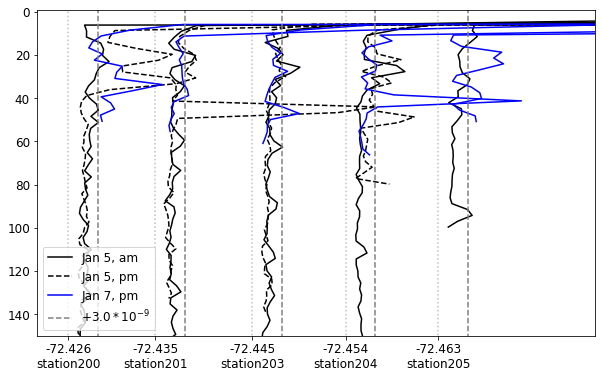

In [130]:
# prefer to see in spaced out line plot instead!

fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(dtDiss_5am.diss[dtDiss_5am.lon==lons[0]]+lons[0]*10**-6, dtDiss_5am.pressure[dtDiss_5am.lon==lons[0]], 'k', label='Jan 5, am')
ax.plot(dtDiss_5am.diss[dtDiss_5am.lon==lons[1]]+lons[1]*10**-6, dtDiss_5am.pressure[dtDiss_5am.lon==lons[1]], 'k')
ax.plot(dtDiss_5am.diss[dtDiss_5am.lon==lons[2]]+lons[2]*10**-6, dtDiss_5am.pressure[dtDiss_5am.lon==lons[2]], 'k')
ax.plot(dtDiss_5am.diss[dtDiss_5am.lon==lons[3]]+lons[3]*10**-6, dtDiss_5am.pressure[dtDiss_5am.lon==lons[3]], 'k')
ax.plot(dtDiss_5am.diss[dtDiss_5am.lon==lons[4]]+lons[4]*10**-6, dtDiss_5am.pressure[dtDiss_5am.lon==lons[4]], 'k')

ax.plot(dtDiss_5.diss[dtDiss_5.lon==lons[0]]+lons[0]*10**-6, dtDiss_5.pressure[dtDiss_5.lon==lons[0]], 'k--', label='Jan 5, pm')
ax.plot(dtDiss_5.diss[dtDiss_5.lon==lons[1]]+lons[1]*10**-6, dtDiss_5.pressure[dtDiss_5.lon==lons[1]], 'k--')
ax.plot(dtDiss_5.diss[dtDiss_5.lon==lons[2]]+lons[2]*10**-6, dtDiss_5.pressure[dtDiss_5.lon==lons[2]], 'k--')
ax.plot(dtDiss_5.diss[dtDiss_5.lon==lons[3]]+lons[3]*10**-6, dtDiss_5.pressure[dtDiss_5.lon==lons[3]], 'k--')

ax.plot(dtDiss_7.diss[dtDiss_7.lon==lons[0]]+lons[0]*10**-6, dtDiss_7.pressure[dtDiss_7.lon==lons[0]], 'b', label='Jan 7, pm')
ax.plot(dtDiss_7.diss[dtDiss_7.lon==lons[1]]+lons[1]*10**-6, dtDiss_7.pressure[dtDiss_7.lon==lons[1]], 'b')
ax.plot(dtDiss_7.diss[dtDiss_7.lon==lons[2]]+lons[2]*10**-6, dtDiss_7.pressure[dtDiss_7.lon==lons[2]], 'b')
ax.plot(dtDiss_7.diss[dtDiss_7.lon==lons[3]]+lons[3]*10**-6, dtDiss_7.pressure[dtDiss_7.lon==lons[3]], 'b')
ax.plot(dtDiss_7.diss[dtDiss_7.lon==lons[4]]+lons[4]*10**-6, dtDiss_7.pressure[dtDiss_7.lon==lons[4]], 'b')

ax.plot([lons[0]*10**-6,lons[0]*10**-6],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[1]*10**-6,lons[1]*10**-6],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[2]*10**-6,lons[2]*10**-6],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[3]*10**-6,lons[3]*10**-6],[276,-1],'grey', ls=':', alpha=0.5)
ax.plot([lons[4]*10**-6,lons[4]*10**-6],[276,-1],'grey', ls=':', alpha=0.5)

ax.plot([lons[0]*10**-6+(3e-09), lons[0]*10**-6+(3e-09)],[276,-1],'grey',ls='--',label='$+ 3.0*10^{-9}$')
ax.plot([lons[1]*10**-6+(3e-09), lons[1]*10**-6+(3e-09)],[276,-1],'grey',ls='--')
ax.plot([lons[2]*10**-6+(3e-09), lons[2]*10**-6+(3e-09)],[276,-1],'grey',ls='--')
ax.plot([lons[3]*10**-6+(3e-09), lons[3]*10**-6+(3e-09)],[276,-1],'grey',ls='--')
ax.plot([lons[4]*10**-6+(3e-09), lons[4]*10**-6+(3e-09)],[276,-1],'grey',ls='--')

ax.legend(loc="lower left")
ax.set_xlim([-0.000072467,-0.00007241])
ax.set_ylim([150,-1])
ax.set_xticks([lons[i]*10**-6 for i in [4,3,2,1,0]])
ax.set_xticklabels(lon_label);